# Day 9 

### BUSI 520: Python for Business Research
### Kerry Back, JGSB, Rice University

### Plan

- Numpy
- Scipy

## Numpy

- Arrays and array operations
- Functions 
- Linear algebra
- The random module 
- The linalg module

In [102]:
import numpy as np

### Arrays

In [103]:
# creating a 1D array

arr = np.array([1, 2, 3, 4, 5])
arr

array([1, 2, 3, 4, 5])

- We actually created a list first: [1, 2, 3, 4, 5]
- Then, we passed the list to the function np.array
- We can go back and forth between lists and arrays

In [133]:
lst = [1, 2, 3, 4, 5]
arr = np.array(lst)
print(arr)
print(type(arr), "\n")
lst = list(arr)
print(lst)
print(type(lst))

[1 2 3 4 5]
<class 'numpy.ndarray'> 

[np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5)]
<class 'list'>


In [104]:
# creating a 2D array

arr = np.array(
    [
        [1, 2, 3], 
        [4, 5, 6], 
        [7, 8, 9]
    ]
)
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [105]:
# creating a 3D array

arr = np.array(
    [
        [
            [1, 2, 3], 
            [4, 5, 6], 
            [7, 8, 9]
        ],
        [
            [10, 11, 12], 
            [13, 14, 15], 
            [16, 17, 18]
        ]
    ]
)
arr

array([[[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9]],

       [[10, 11, 12],
        [13, 14, 15],
        [16, 17, 18]]])

### Warning redux

- Arrays, like lists and dataframes, are assigned by reference
- If you want a copy, use the copy method

In [106]:
# assignment does not create a new copy, just a new reference to the original
# so any changes are made to the original 

arr = np.array(
    [
        [1, 2, 3], 
        [4, 5, 6], 
        [7, 8, 9]
    ]
)

# assignment
arr2 = arr 

# change the new one
arr2[0, 0] = 50

# check the original
arr

array([[50,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9]])

In [107]:
# create a copy if you want to make changes without changing the original 

arr = np.array(
    [
        [1, 2, 3], 
        [4, 5, 6], 
        [7, 8, 9]
    ]
)

# assignment
arr2 = arr.copy()

# change the new one
arr2[0, 0] = 50

# check the original
arr

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

### Array Attributes

NumPy arrays have several attributes that give information about the array's size, shape, and data type:

```python 
arr.shape 
arr.size 
arr.ndim
arr.dtype
```


### 1D Shapes

- We usually think of a 1D array as either a column vector or a row vector
- Numpy 1D arrays are neither row vectors nor column vectors
- A row vector has shape $1 \times n$ (i.e., 2D with 1 row).
- A column vector has shape $n \times 1$ (i.e., 2D with 1 column).
- A 1D array has shape $n$.  It has no fixed orientation.  So, its orientation is adaptable.  More later.

In [108]:
x = np.array([1, 2, 3])

# x has no orientation
print(x.shape)

# create a 2D array with one row (a row vector)
x = np.array(
    [
        [1, 2, 3]
    ]
)
print(x.shape)

# create a 2D array with one column (a column vector)
x = np.array(
    [
        [1], 
        [2], 
        [3]
    ]
)
print(x.shape)

(3,)
(1, 3)
(3, 1)


### Array Indexing and Slicing

Indexing and slicing works the same way as for lists and the same as the .iloc method for dataframes.

In [109]:
arr = np.array(
    [
        [1, 2, 3], 
        [4, 5, 6], 
        [7, 8, 9]
    ]
)

Try 

```python 
arr[1, 2]
arr[0]
arr[0, :]
arr[:, 0]
arr[0][1]
arr[-1, :]
arr[:, -1]
arr[1:3, 1:3]
arr[::2, ::2]
arr > 2
arr[arr > 2]
arr[:, 0] > 2 
arr[arr[:, 0] > 2, :]
```

### Some array-creating functions

Try 

```python
np.ones(4)
np.ones((2, 3))
np.zeros(4) 
np.zeros((2, 3))
np.arange(10)
np.arange(1, 12, 2)
np.linspace(0, 1, 5)  # note endpoint is included
np.empty(4)
np.empty((2, 3))
np.full((2, 3), 5)
np.repeat(arr, 2)
np.tile(arr, 2)
np.eye(3)
np.diag([1, 2, 3])
np.logspace(0, 1, 4)  # = 10**np.linspace(0, 1, 4)
```

### Reshaping

- arr.reshape
- arr.flatten
- arr.ravel

In [110]:
# reshape 

x = np.arange(3)
print(x)
print(x.shape, "\n")
print(x.reshape(1, 3))
print(x.reshape(1, 3).shape)
print(x.reshape(1, -1).shape, "\n")
print(x.reshape(3, 1))
print(x.reshape(3, 1).shape)
print(x.reshape(-1, 1).shape)


[0 1 2]
(3,) 

[[0 1 2]]
(1, 3)
(1, 3) 

[[0]
 [1]
 [2]]
(3, 1)
(3, 1)


### Ravel and flatten 

- both turn arrays into 1D arrays (with no orientation)
- ravel returns a view of the array
- flatten returns a copy of the array

In [111]:
# flatten

x = np.arange(1, 10).reshape(3, 3)
print(x)

y = x.flatten()
print(y)
print(y.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
(9,)


In [112]:
# ravel 

x = np.arange(1, 10).reshape(3, 3)
print(x)

y = x.flatten()
print(y)
print(y.shape)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[1 2 3 4 5 6 7 8 9]
(9,)


### Concatenate 

- Combine arrays with np.concatenate
- Put arrays on top of each other with axis=0
- Put arrays side by side with axis=1

In [113]:
arr1 = np.arange(1, 7).reshape(2, 3)
arr2 = np.arange(7, 13).reshape(2, 3)
print(np.concatenate((arr1, arr2), axis=0))
print(np.concatenate((arr1, arr2), axis=1))

[[ 1  2  3]
 [ 4  5  6]
 [ 7  8  9]
 [10 11 12]]
[[ 1  2  3  7  8  9]
 [ 4  5  6 10 11 12]]


### Array Operations

- Addition, multiplication, etc. are applied element-by-element
- Addition and multiplication work differently for arrays compared to lists


In [138]:
arr1 = np.arange(9).reshape(3, 3)
print(arr1, "\n")
print(arr1**2, "\n")
print(arr1 + 100, "\n")

arr2 = np.arange(10, 19).reshape(3, 3)
print(arr2, "\n")
print(arr1 + arr2, "\n")

print(1.1**np.arange(5))


[[0 1 2]
 [3 4 5]
 [6 7 8]] 

[[ 0  1  4]
 [ 9 16 25]
 [36 49 64]] 

[[100 101 102]
 [103 104 105]
 [106 107 108]] 

[[10 11 12]
 [13 14 15]
 [16 17 18]] 

[[10 12 14]
 [16 18 20]
 [22 24 26]] 

[1.     1.1    1.21   1.331  1.4641]


In [140]:
# compare adding and multiplying arrays vs lists 

lst1 = [1, 2, 3, 4, 5]
arr1 = np.array(lst)

print(2 * lst1)
print(2 * arr1, "\n")

lst2 = [6, 7, 8, 9, 10]
arr2 = np.array(lst2)

print(lst1 + lst2)
print(arr1 + arr2)

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]
[ 2  4  6  8 10] 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[ 7  9 11 13 15]


### Broadcasting

- Broadcasting is used when the shapes of the arrays are different. - When possible, the smaller array is replicated to match the size of the larger array.
- For example, a scalar is treated as an array of the same shape as the other array.
- The shape of the smaller array dictates how it will be broadcasted.

In [114]:
# adding a smaller 1D array (with no orientation) 

arr1 = np.arange(1, 10).reshape((3, 3))
arr2 = np.arange(10, 13)
print(arr1)
print(arr2)
print("\n")
print(arr1 + arr2)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[10 11 12]


[[11 13 15]
 [14 16 18]
 [17 19 21]]


In [115]:
# adding a column vector adds the vector to each column 

arr1 = np.arange(1, 10).reshape((3, 3))
arr2 = np.arange(10, 13).reshape((3, 1))
print(arr1, "\n")
print(arr2, "\n")
print(arr1 + arr2)

[[1 2 3]
 [4 5 6]
 [7 8 9]] 

[[10]
 [11]
 [12]] 

[[11 12 13]
 [15 16 17]
 [19 20 21]]


### Array methods 

- Arrays have many methods. Type arr. in a code cell to see them all.
- Aggregation methods: sum, mean, std, var, min, max, argmin, argmax, cumsum, cumprod
- Aggregation methods can operate down columns or across rows or over the entire array


In [116]:
arr = np.arange(1, 7).reshape(2, 3)
print(arr, "\n")

# entire array
print(arr.sum(), "\n")

# down columns
print(arr.sum(axis=0), "\n")
print("\n")

# across rows
print(arr.sum(axis=1))

[[1 2 3]
 [4 5 6]] 

21 

[5 7 9] 



[ 6 15]


### Numpy functions 

- Numpy has aggregation functions (often duplicates of methods): np.sum(), np.std(), ... 
- Numpy also has functions that apply element-by-element: np.exp(), np.log(), np.sqrt(), np.abs(), np.sign(), np.ceil(), np.floor(), np.round(), np.isnan(), np.isinf(), np.isfinite and more.
- Try some.

### Linear algebra 

- matrix/vector multiplication is with the @ operator
- transpose is .T
- 1D arrays are mutable.  numpy will orient them as needed. A 1D array equals its own transpose (so there is no point to transposing it).


In [117]:
arr1 = np.arange(1, 7).reshape(2, 3)
arr2 = np.arange(3) 
print(arr1, "\n")
print(arr2, "\n")
print(arr1 @ arr2)

[[1 2 3]
 [4 5 6]] 

[0 1 2] 

[ 8 17]


### numpy random module

- The `np.random` module in NumPy provides a suite of functions to generate random numbers for various distributions.
- Type np.random. in a code cell to see the functions available.

1. Random number generation:
   - `rand()`: Generates uniform random numbers between 0 and 1 in a given shape.
   - `randn()`: Generates random numbers from a standard normal distribution (mean 0 and variance 1).
   - `randint()`: Generates random integers between specified low and high values.
   - `randn(3, 4)` and `normal(size=(3, 4))` are the same thing. normal allows you to specify mean and std dev.
   - `binomial()`: Draws samples from a binomial distribution.
   - `normal()`: Draws samples from a normal (Gaussian) distribution.
   - `poisson()`: Draws samples from a Poisson distribution.
   - ... and many more for other distributions.

2. Random sampling:
   - `choice()`: Generates a random sample from a given 1-D array.
   - `shuffle()`: Modifies a sequence in-place by shuffling its contents.
   - `permutation()`: Returns a shuffled version of a sequence or returns a permuted range.

Try 

```python   
np.random.seed(0)
np.random.randn(9, (3, 3))
np.random.randint(0, 10, 10)
np.random.choice(["a", "b", "c"], 10)
```

### numpy linalg module

- The `np.linalg` module in NumPy provides a collection of linear algebra functions, including eigenvalues and eigenvectors, and matrix norms, determinants, and ranks.  It will also solve linear equations and invert matrices. 
- Example: if you want to compute regression coefficients $(X'X)^{-1}X'y$, you can use 
  - `np.linalg.inv(X.T @ X) @ X.T @ y` or 
  - `np.linalg.solve(X.T @ X, X.T @ y)`
- It won't matter most of the time, but the second method is faster and more numerically stable.


## Scipy 

* Optimization
* Solving (systems of) nonlinear equations
* Interpolation and extrapolation
* Nonlinear regression
* stats module
* skipping numerical integration and differentiation and differential equations


### Optimization

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html

- There is no guarantee of finding a global optimum.  It can be difficult to find optima in high dimensions.  
- There are choices of algorithms.  Different algorithms have various advantages and disadvantages.
- Can optimize subject to bounds or more general constraints.

In [118]:
# basic optimization  

from scipy.optimize import minimize

# Define a simple function forexample
def func(x):
    return x**2 + x + 2

# minimize using scipy.optimize.minimize
result = minimize(func, x0=0)
min_point = result.x
min_value = result.fun
print(f"minimum value is {min_value:.2f} and argmin is {min_point[0]:.2f}")

minimum value is 1.75 and argmin is -0.50


In [119]:
# a function of two variables and with bounds 

def func(x):

    # extract the elements of the array x into (x0, x1)
    x0, x1 = x
    return (x0 - 1)**2 + (x1 - 2.5)**2

# define bounds for the variables
bounds = [(2, 3), (0, 1)]

# minimize with bounds
result = minimize(func, x0=[1, 2], bounds=bounds)
min_point = result.x
min_value = result.fun

print(f"minimum value is {min_value:.2f} and argmin is {np.round(min_point, 2)}")

minimum value is 3.25 and argmin is [2. 1.]


In [120]:
# a function of three variables with more general constraints

def func(x):

    # extract the elements of the array x into (x0, x1, x2)
    x0, x1, x2 = x
    return x0*x1 - x1*x2

# define constraints
def constraint1(x):
    x0, x1, x2 = x
    return x0 + x1 - 2

def constraint2(x):
    x0, x1, x2 = x
    return x1**2 + x2**2 - 1

constraints = (
    {'type': 'eq', 'fun': constraint1},
    {'type': 'eq', 'fun': constraint2}
)

# minimize with constraints
result = minimize(func, x0=[0, 0, 0], constraints=constraints)
min_point = result.x
min_value = result.fun

print(f"minimum value is {min_value:.2f} and argmin is {np.round(min_point, 2)}")

minimum value is 0.51 and argmin is [1.17 0.83 0.56]


### Solving equations

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.root.html

Again, there are various algorithms available, and it can be difficult to find solutions in high dimensions.

In [121]:
from scipy.optimize import root

# function of one variable
def func(x):
    return x**3 - 4*x**2 - 7*x + 10


# find roots 
result = root(func, x0=[0, 2, 3])
roots = result.x

print(f"roots are {roots}")

roots are [ 1.  1. -2.]


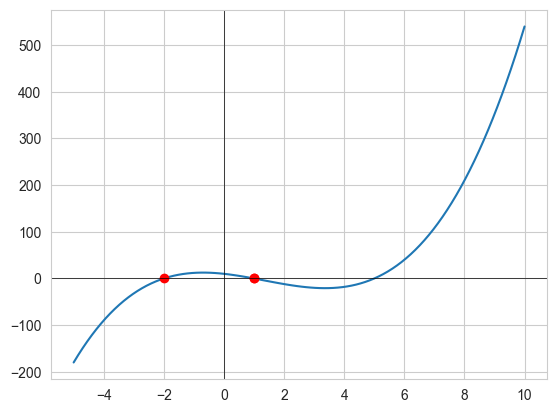

In [122]:
# plot the function and its roots 

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

x = np.linspace(-5, 10, 100)
y = func(x)

plt.plot(x, y)
plt.plot(roots, func(roots), 'ro')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.show()

In [123]:
# function of two variables
def func(x):
    x0, x1 = x
    f1 = x0**2 + x1**2 - 1
    f2 = x0*x1 - 0.5
    return [f1, f2]

result = root(func, x0=[0.5, 0.5])
roots = result.x
print(f"roots are {roots}")  # each root is a array of shape (2,)

roots are [0.70710677 0.70710679]


### Interpolation and Extrapolation

 - linear and spline interpolation 
 - A spline is a smooth function that passes through given points.  
 - A cubic spline is a piecewise cubic function with parameters chosen to produce a smooth function passing through given points.

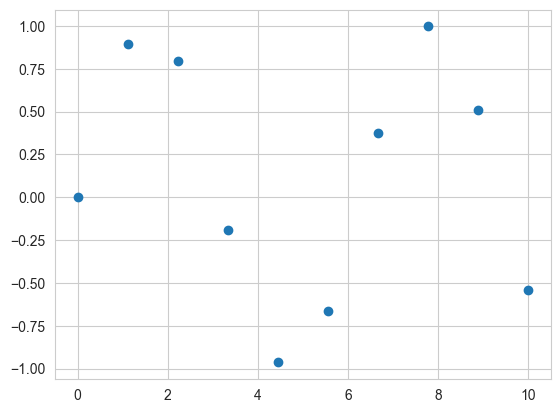

In [124]:
from scipy.interpolate import interp1d, UnivariateSpline

# given data
x = np.linspace(0, 10, 10)
y = np.sin(x)
plt.scatter(x, y)

In [126]:
# points at which to interpolate 
# 
x_interp = np.linspace(0, 10, 100) 

# linear interpolation
linear_interp = interp1d(x, y)
y_linear = linear_interp(x_interp)

# spline interpolation 
# s parameter determines tradeoff between smoothness and accuracy
# s=0 means perfect accuracy (interpolation)
spline_interp = UnivariateSpline(x, y, s=0)  
y_spline = spline_interp(x_interp)

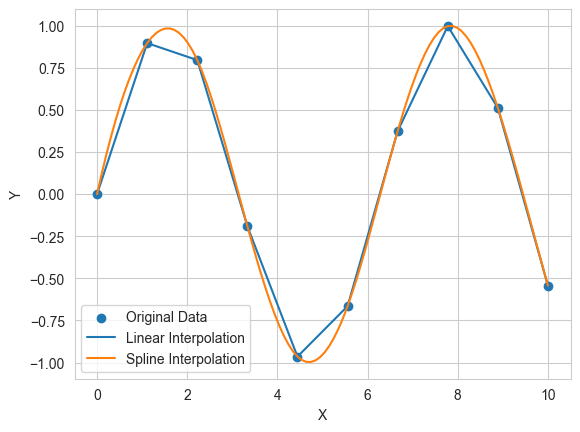

In [127]:
plt.scatter(x, y, label='Original Data')
plt.plot(x_interp, y_linear, label='Linear Interpolation')
plt.plot(x_interp, y_spline, label='Spline Interpolation')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [128]:
# grid on which to interpolate and extrapolate
x_extrap = np.linspace(-2, 12, 100)

# Linear extrapolation
linear_extrap = interp1d(x, y, fill_value='extrapolate')
y_linear_extrap = linear_extrap(x_extrap)

# Spline extrapolation
spline_extrap = UnivariateSpline(x, y, s=0, ext='extrapolate')
y_spline_extrap = spline_extrap(x_extrap)

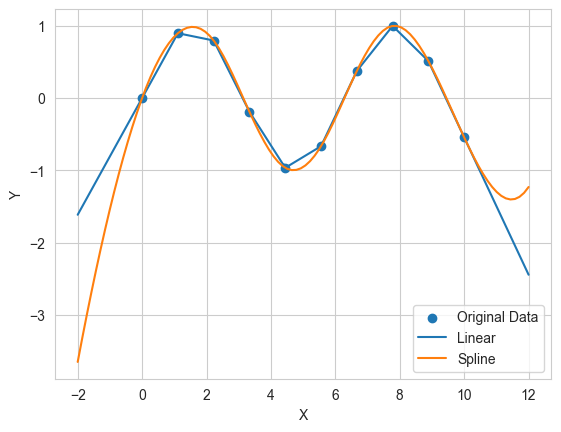

In [130]:
plt.scatter(x, y, label='Original Data')
plt.plot(x_extrap, y_linear_extrap, label='Linear')
plt.plot(x_extrap, y_spline_extrap, label='Spline')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

### Nonlinear regression

https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

- In the next example, we find parameters $a$ and $b$ to minimize the sum of squared errors
$$\sum_{i=1}^n \big[y_i - f(x_i | a, b)\big]^2$$ 
with $f(x|a, b) = a \cdot \sin(bx)$.  
- It provides a covariance matrix for the parameter estimates based on the delta method.
- Can also use weighted least squares

In [ ]:
from scipy.optimize import curve_fit

# generate data
np.random.seed(0)
x_data = np.linspace(-2, 2, 100)
y_data = 2.9 * np.sin(1.5 * x_data) + np.random.normal(size=100)

# functional form to fit
def func(x, a, b):
    return a * np.sin(b * x)

popt, pcov = curve_fit(func, x_data, y_data)
print(f"optimal parameters are {np.round(popt, 2)}")

optimal parameters are [2.79 1.51]


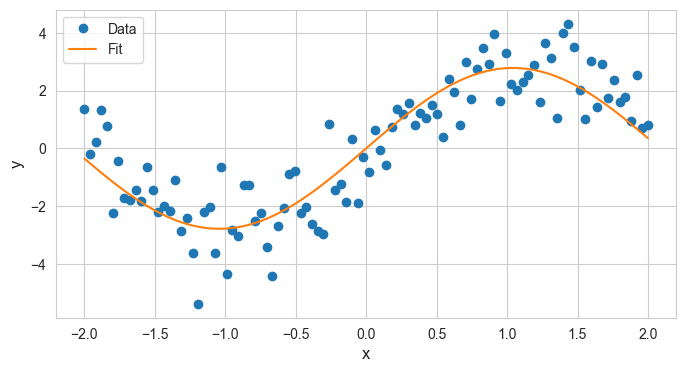

In [ ]:
# plot the data and the fit
y_fit = func(x_data, *popt)

plt.plot(x_data, y_data, 'o', label='Data')
plt.plot(x_data, y_fit, '-', label='Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

### stats module

- pdf, cdf, rvs, ttest, and more
- many distributions available

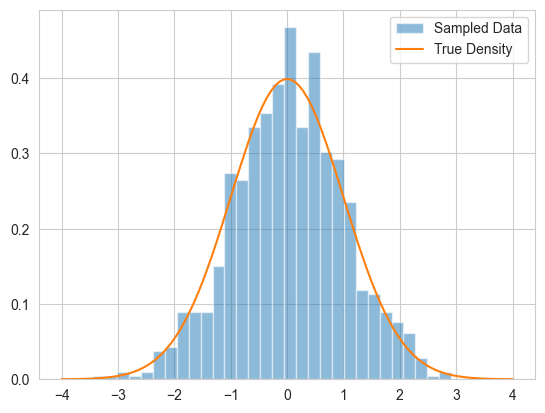

In [132]:
from scipy.stats import norm 

grid = np.linspace(-4, 4, 100)
density = norm.pdf(grid) 

sample = norm.rvs(size=1000)

plt.hist(sample, bins=30, density=True, alpha=0.5, label='Sampled Data')
plt.plot(grid, density, label='True Density')
plt.legend()
plt.show()